# Title of ML project: Secondary Mushroom

Name:**MAHALAKSHMI V S**

Organization: **ENTRI ELEVATE**

Date: **26.04.2025**

# 1. Overview of Problem Statement:
The **Secondary Mushroom project** aims to develop a machine learning model to **classify mushrooms as edible or poisonous** based on their observable characteristics. By leveraging data preprocessing, feature engineering, and model training, the goal is to achieve high classification accuracy. The project addresses food safety concerns by providing an automated method for mushroom identification. The outcome can help foragers, researchers, and food industries make informed decisions.

# 2. Objective:
The objective of this project is to develop an efficient machine learning model for accurately classifying mushrooms as edible or poisonous based on their observable characteristics. This involves:

* **Preprocessing and analyzing** the dataset to handle missing values, categorical variables, and class imbalances.
* **Feature engineering** to extract meaningful insights and improve model performance.
* **Deploying the model** for real-world applications in food safety, foraging assistance, and ecological research.

# 3. Data Description:
**Source:** UCI Machine Learning Repository – Secondary Mushroom Dataset

# **- Features:**


*   **Class** – Edibility of the mushroom (edible or poisonous).
*  **Cap-diameter** – Diameter of the mushroom cap in centimeters.
*   **Cap-shape** – Shape of the mushroom cap (e.g., convex, flat, bell).
*   **Cap-surface** – Texture of the cap (e.g., smooth, scaly, wrinkled).
*   **Cap-color** – Color of the mushroom cap (e.g., red, white, brown).
*   **Does-bruise-or-bleed** – Indicates if the mushroom bruises or bleeds when touched.
*   **Gill-attachment** – Describes how the gills attach to the stem.
* **Gill-spacing** – Distance between gills (close, distant, none).
*    **Gill-color** – Color of the mushroom gills (e.g., black, white, pink).
*  **Stem-height** – Height of the mushroom stem in centimeters.
*   **Stem-width** – Width of the mushroom stem in millimeters.
*   **Stem-root** – Type of stem root (e.g., bulbous, rooted, club).
*    **Stem-surface** – Texture of the mushroom stem (e.g., smooth, fibrous).
*  **Stem-color** – Color of the stem (e.g., yellow, brown, white).
*   **Veil-type** – Type of veil covering the mushroom (partial or universal).
*  **Veil-color** – Color of the veil (e.g., white, yellow, brown).
*  **Has-ring** – Indicates if the mushroom has a ring on its stem.
*   **Ring-type** – Type of ring on the stem (e.g., large, pendant, flaring).
*    **Spore-print-color** – Color of the spores left by the mushroom.
*  **Habitat** – Natural environment where the mushroom grows (e.g., grass, woods).
*  **Season** – The season in which the mushroom is typically found.




# Data Collection

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset and first 5 is displayed
df = pd.read_csv("/content/drive/MyDrive/Entri/FINALPROJECT/secondary_data.csv")
df.sample(5)

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
21035,p,3.49,b,d,r,f,a,NaN,y,5.33,...,NaN,t,r,NaN,NaN,f,f,NaN,g,u
37273,p,4.94,x,h,r,f,s,c,n,6.64,...,NaN,y,l,NaN,NaN,t,e,k,g,u
22364,e,6.76,x,h,y,t,x,c,y,7.06,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
30059,p,7.50,s,t,p,t,d,c,p,6.22,...,NaN,NaN,p,NaN,NaN,t,f,NaN,d,u
53472,p,9.99,f,t,n,t,d,c,n,5.66,...,NaN,NaN,n,NaN,NaN,f,f,NaN,h,u


# 5.Data Preprocessing - Data Cleaning:

In [3]:
#Check If there is any Null Value present in Dataset in percentage
round(df.isnull().sum()/df.shape[0]*100,2)

,0
class,0.00
cap_diameter,0.00
cap_shape,0.00
cap_surface,23.12
cap_color,0.00
does_bruise_or_bleed,0.00
gill_attachment,16.18
gill_spacing,41.04
gill_color,0.00
stem_height,0.00


In [5]:
#Check if there is any duplicate value present in the dataset
df.duplicated().sum()
#if yes drop duplicates
df1=df.drop_duplicates()

In [6]:
# drop the columns that have missing values more than 50%
df2=df1.drop(columns=['veil_type','veil_color','stem_root','stem_surface','spore_print_color'])
df2

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,y,f,f,d,u


In [7]:
#since 'ring_type' has only few missing values drop the null rows only and chcek the shape
df1.dropna(subset=['ring_type'],axis=0,inplace=True)
df1.shape

<ipython-input-7-07c1957735d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['ring_type'],axis=0,inplace=True)


(58452, 21)

#
 **Perform Encoding**(convert object to float / int)


In [8]:
df2=df1

In [9]:
order = ['e','p']
order_mapping = {label: index for index, label in enumerate(order)}
df2['class_encoded'] = df2['class'].map(order_mapping)
order = ['b','c','f','o','p','s','x']
order_mapping = {label: index for index, label in enumerate(order)}
df2['cap_shape_encoded'] = df2['cap_shape'].map(order_mapping)
order = ['d','e','g','h','i','k','l','s','t','w','y']
order_mapping = {label: index for index, label in enumerate(order)}
df2['cap_surface_encoded'] = df2['cap_surface'].map(order_mapping)
order = ['b','e','g','k','l','n','o','p','r','u','w','y']
order_mapping = {label: index for index, label in enumerate(order)}
df2['cap_color_encoded'] = df2['cap_color'].map(order_mapping)
order = ['f','t']
order_mapping = {label: index for index, label in enumerate(order)}
df2['does_bruise_or_bleed_encoded'] = df2['does_bruise_or_bleed'].map(order_mapping)
order = ['a','d','e','f','p','s','x']
order_mapping = {label: index for index, label in enumerate(order)}
df2['gill_attachment_encoded'] = df2['gill_attachment'].map(order_mapping)
order = ['c','d','f']
order_mapping = {label: index for index, label in enumerate(order)}
df2['gill_spacing_encoded'] = df2['gill_spacing'].map(order_mapping)
order = ['b','e','f','g','k','n','o','p','r','u','w','y']
order_mapping = {label: index for index, label in enumerate(order)}
df2['gill_color_encoded'] = df2['gill_color'].map(order_mapping)
order = ['b','e','f','g','k','l','n','o','p','r','u','w','y']
order_mapping = {label: index for index, label in enumerate(order)}
df2['stem_color_encoded'] = df2['stem_color'].map(order_mapping)
order = ['f','t']
order_mapping = {label: index for index, label in enumerate(order)}
df2['has_ring_encoded'] = df2['has_ring'].map(order_mapping)
order = ['e','f','g','l','m','p','r','z']
order_mapping = {label: index for index, label in enumerate(order)}
df2['ring_type_encoded'] = df2['ring_type'].map(order_mapping)
order = ['d','g','h','l','m','p','u','w']
order_mapping = {label: index for index, label in enumerate(order)}
df2['habitat_encoded'] = df2['habitat'].map(order_mapping)
order = ['a','s','u','w']
order_mapping = {label: index for index, label in enumerate(order)}
df2['season_encoded'] = df2['season'].map(order_mapping)

<ipython-input-9-41d3c2ea6c38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['class_encoded'] = df2['class'].map(order_mapping)
<ipython-input-9-41d3c2ea6c38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cap_shape_encoded'] = df2['cap_shape'].map(order_mapping)
<ipython-input-9-41d3c2ea6c38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [10]:
#delete the original columns and keep the encoded ones
original_columns_to_drop = ['class',
    'cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed',
    'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color',
    'season', 'habitat', 'ring_type', 'has_ring' , 'stem_root',
    'stem_surface', 'veil_type', 'veil_color', 'spore_print_color'
]
df2 = df2.drop(columns=[col for col in original_columns_to_drop if col in df2.columns], errors='ignore')
df2.isnull().sum()

,0
cap_diameter,0
stem_height,0
stem_width,0
class_encoded,0
cap_shape_encoded,0
cap_surface_encoded,13767
cap_color_encoded,0
does_bruise_or_bleed_encoded,0
gill_attachment_encoded,9502
gill_spacing_encoded,24003


In [11]:
#check info of dataset so they all are numerical values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58452 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cap_diameter                  58452 non-null  float64
 1   stem_height                   58452 non-null  float64
 2   stem_width                    58452 non-null  float64
 3   class_encoded                 58452 non-null  int64  
 4   cap_shape_encoded             58452 non-null  int64  
 5   cap_surface_encoded           44685 non-null  float64
 6   cap_color_encoded             58452 non-null  int64  
 7   does_bruise_or_bleed_encoded  58452 non-null  int64  
 8   gill_attachment_encoded       48950 non-null  float64
 9   gill_spacing_encoded          34449 non-null  float64
 10  gill_color_encoded            58452 non-null  int64  
 11  stem_color_encoded            58452 non-null  int64  
 12  has_ring_encoded              58452 non-null  int64  
 13  ring_t

In [12]:
#Describe Dataset
df2.describe()

,cap_diameter,stem_height,stem_width,class_encoded,cap_shape_encoded,cap_surface_encoded,cap_color_encoded,does_bruise_or_bleed_encoded,gill_attachment_encoded,gill_spacing_encoded,gill_color_encoded,stem_color_encoded,has_ring_encoded,ring_type_encoded,habitat_encoded,season_encoded
count,58452.000000,58452.000000,58452.000000,58452.000000,58452.000000,44685.000000,58452.000000,58452.000000,48950.000000,34449.000000,58452.000000,58452.000000,58452.000000,58452.000000,58452.000000,58452.000000
mean,6.690789,6.509678,12.209577,0.559143,4.028280,5.455052,6.126326,0.175135,2.531359,0.413365,7.301273,8.397437,0.217204,1.470146,0.639516,1.047252
std,5.318472,3.376686,10.200153,0.496494,2.124764,3.275776,3.175573,0.380086,2.185775,0.663862,3.190100,3.220772,0.412346,1.497649,1.288228,1.100076
min,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000,4.590000,5.030000,0.000000,2.000000,2.000000,5.000000,0.000000,1.000000,0.000000,5.000000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,5.820000,5.880000,10.160000,1.000000,5.000000,7.000000,5.000000,0.000000,2.000000,0.000000,7.000000,10.000000,0.000000,1.000000,0.000000,1.000000
75%,8.490000,7.550000,16.700000,1.000000,6.000000,8.000000,10.000000,0.000000,5.000000,1.000000,10.000000,11.000000,0.000000,1.000000,1.000000,2.000000
max,62.340000,33.920000,103.910000,1.000000,6.000000,10.000000,11.000000,1.000000,6.000000,2.000000,11.000000,12.000000,1.000000,7.000000,7.000000,3.000000


In [13]:
#fill the null spaces of 'cap_surface_encoded', 'gill_attachment_encoded' , 'gill_spacing_encoded' with their own meadian values
df2['cap_surface_encoded'].fillna(df2['cap_surface_encoded'].median(),inplace=True)
df2['gill_attachment_encoded'].fillna(df2['gill_attachment_encoded'].median(),inplace=True)
df2['gill_spacing_encoded'].fillna(df2['gill_spacing_encoded'].median(),inplace=True)

<ipython-input-13-20b62e77feb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['cap_surface_encoded'].fillna(df2['cap_surface_encoded'].median(),inplace=True)
<ipython-input-13-20b62e77feb4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [14]:
#every null spaces are treated
df2.isnull().sum()

,0
cap_diameter,0
stem_height,0
stem_width,0
class_encoded,0
cap_shape_encoded,0
cap_surface_encoded,0
cap_color_encoded,0
does_bruise_or_bleed_encoded,0
gill_attachment_encoded,0
gill_spacing_encoded,0


In [15]:
#to check skewness is present or not
df2.skew()

,0
cap_diameter,3.873378
stem_height,2.143314
stem_width,2.142197
class_encoded,-0.238249
cap_shape_encoded,-0.545891
cap_surface_encoded,-0.594126
cap_color_encoded,0.110983
does_bruise_or_bleed_encoded,1.709487
gill_attachment_encoded,0.477789
gill_spacing_encoded,2.176439


Skewness Value	Interpretation
* ≈ 0	Symmetrical (Normal)
*. > 0	Positively skewed (right-tailed)
* < 0	Negatively skewed (left-tailed)

# 6. Exploratory Data Analysis (EDA):

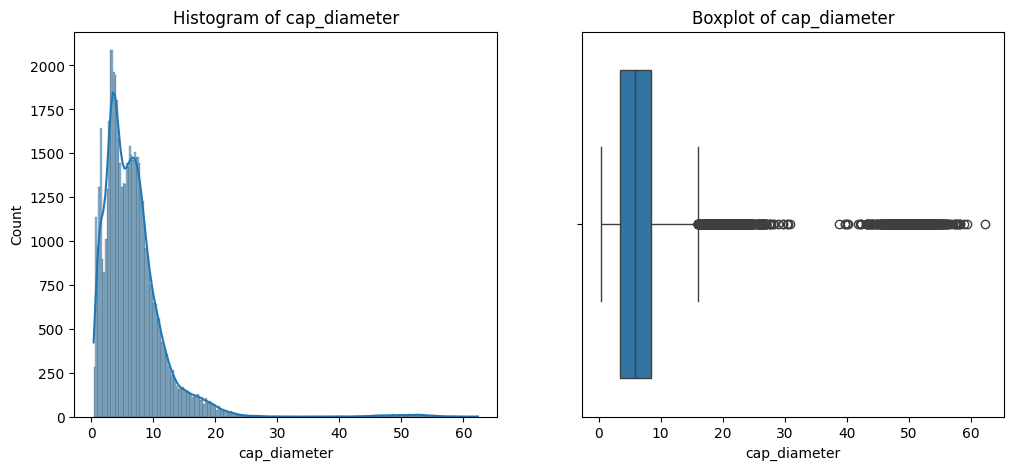

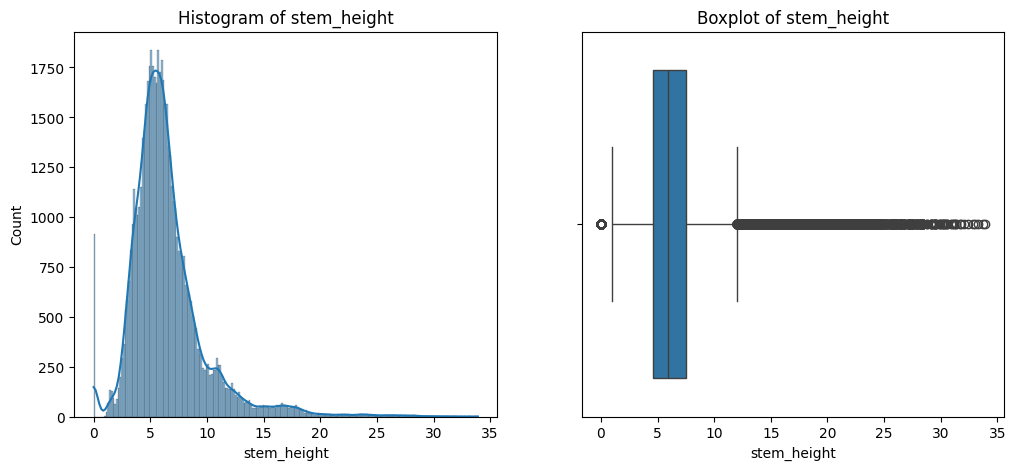

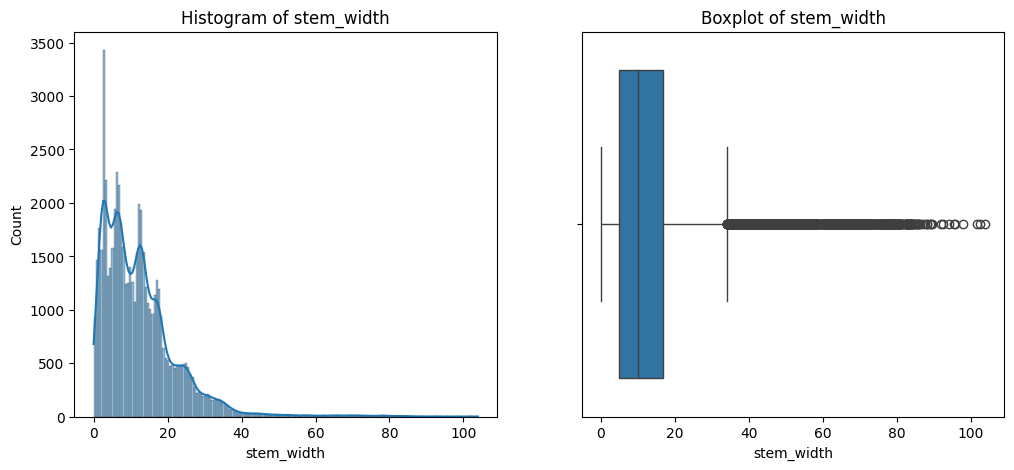

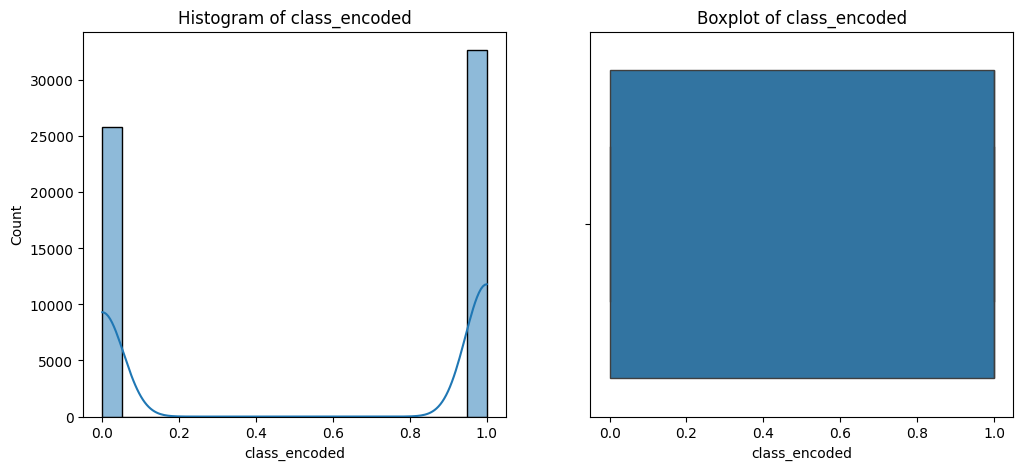

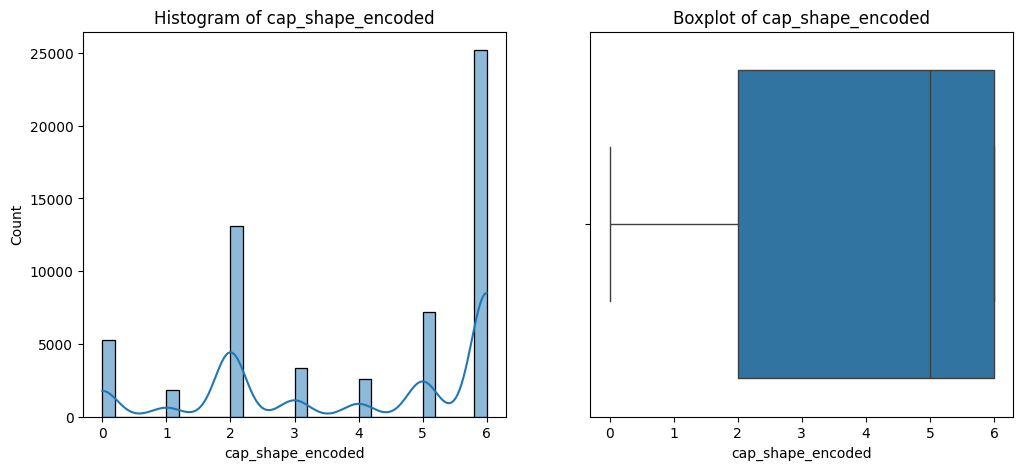

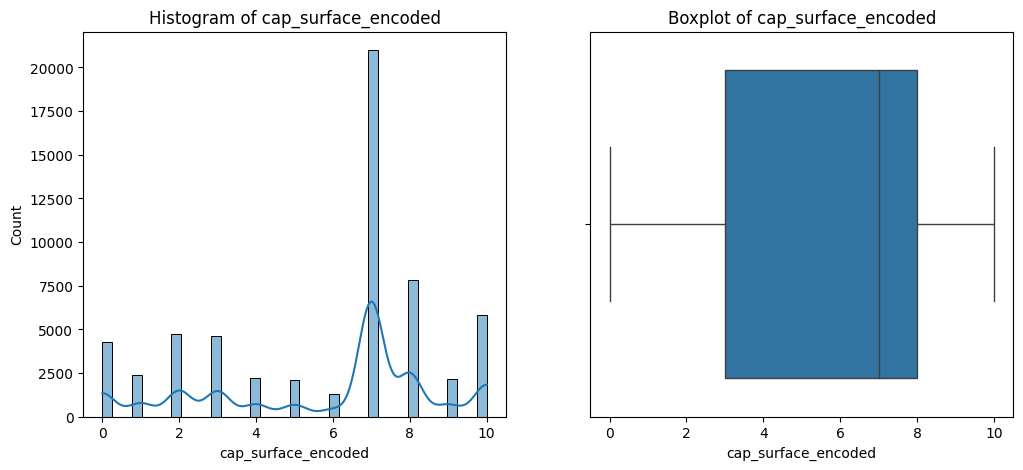

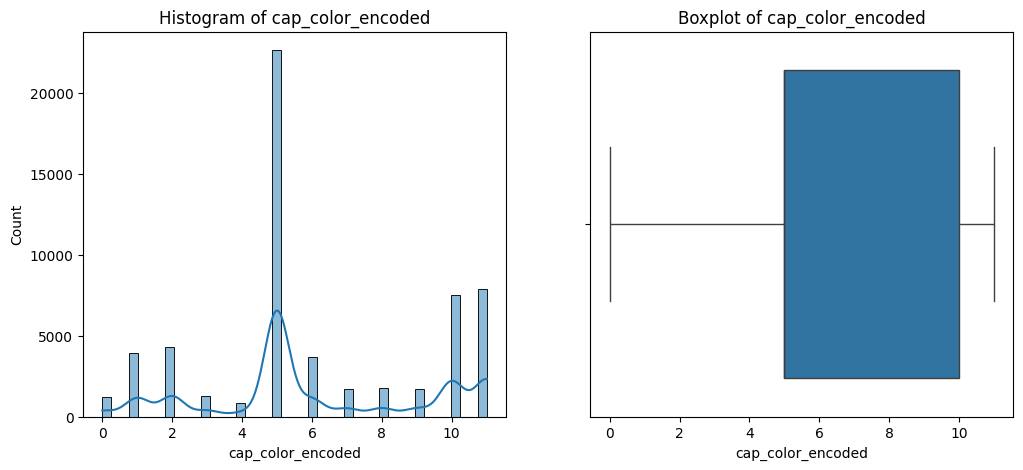

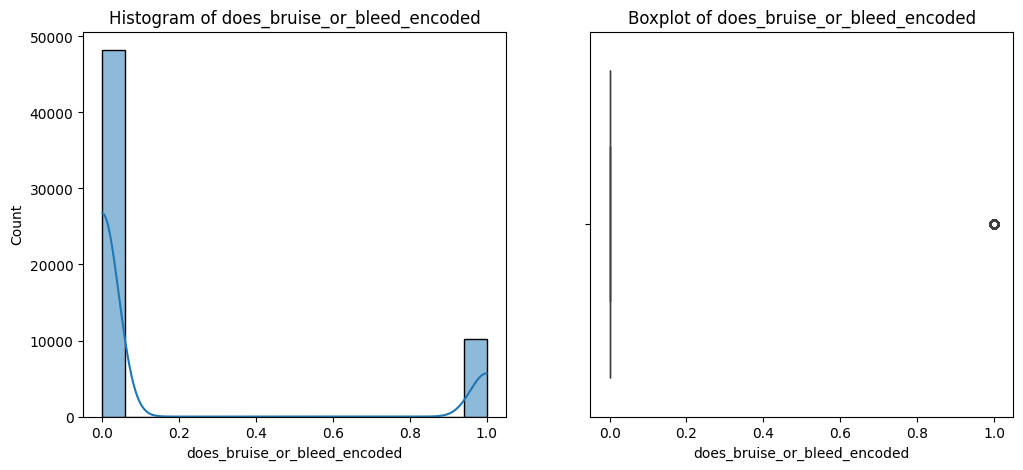

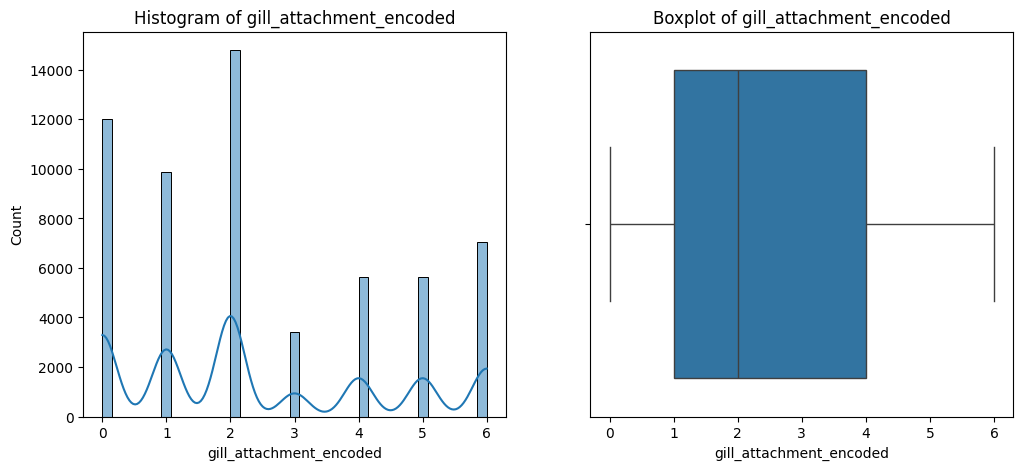

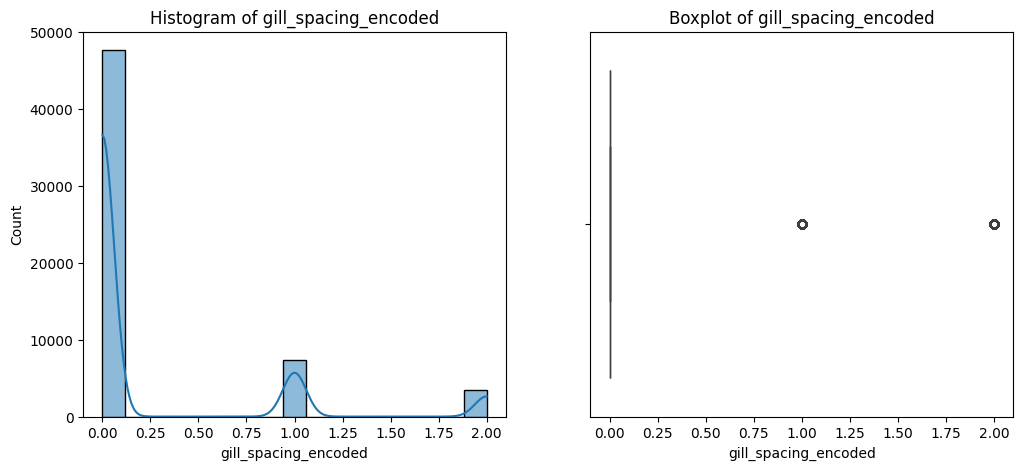

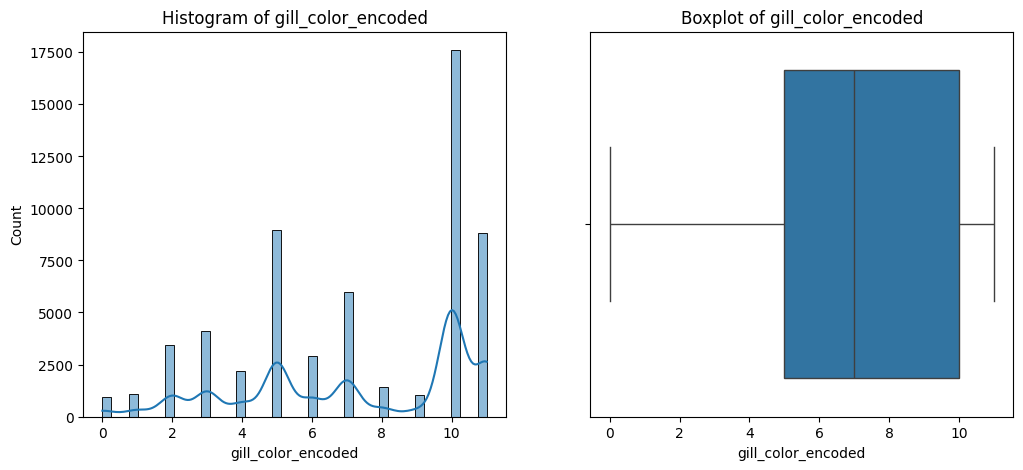

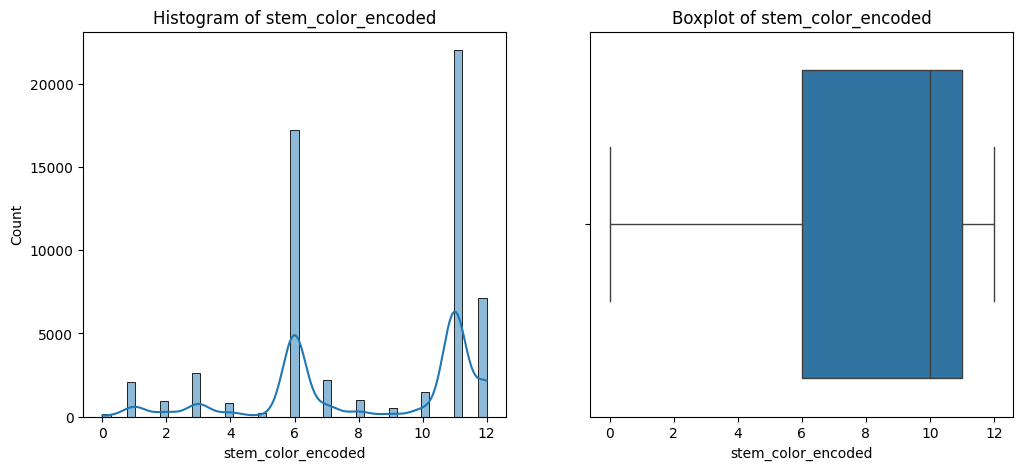

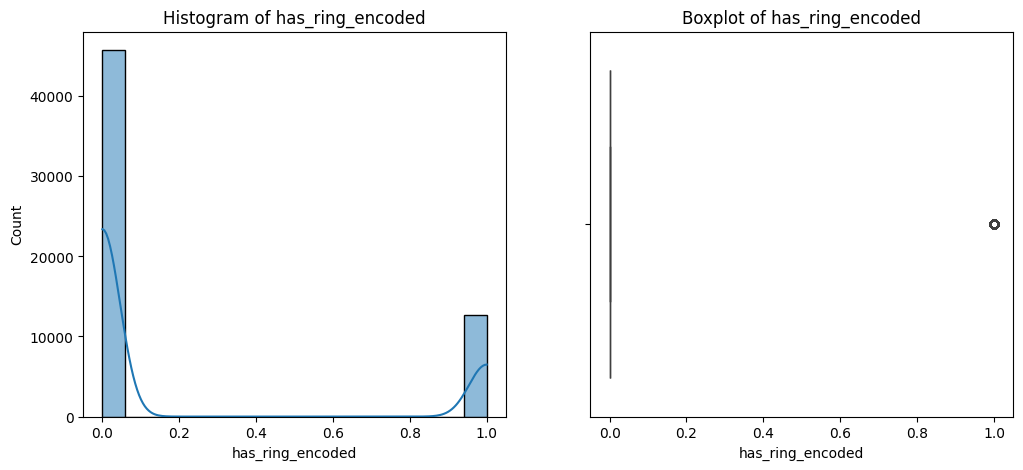

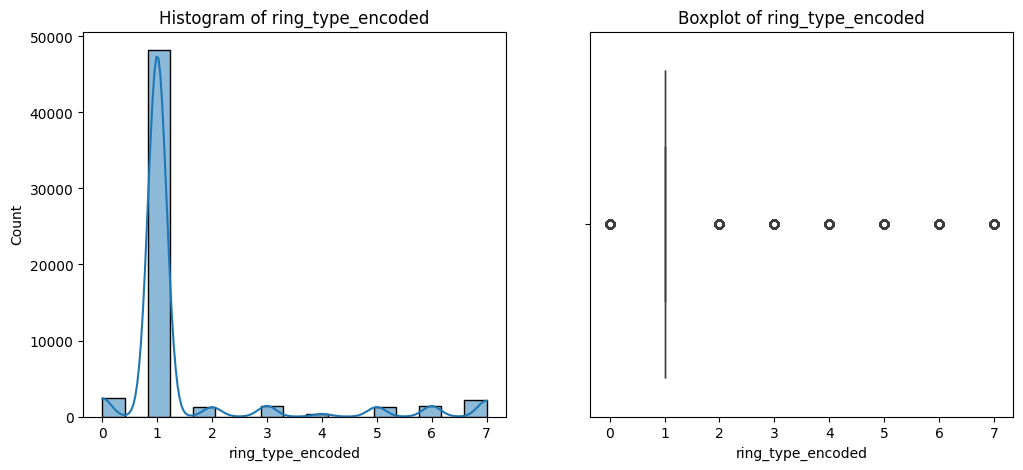

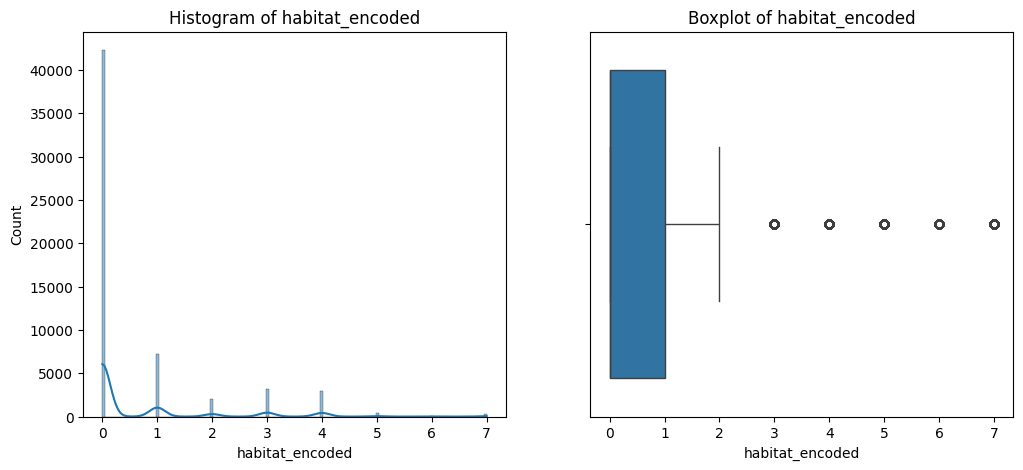

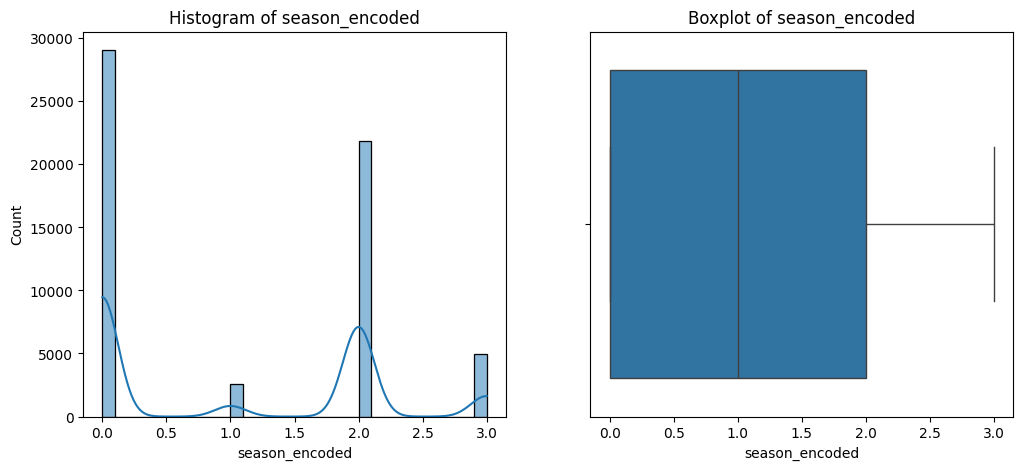

In [16]:
#plot the columns in diffrent visualizations to understand and analyze data
for column in df2:
    plt.figure(figsize=(12,5))
    #histogram
    plt.subplot(1,2,1)
    sns.histplot(df2[column],kde=True)
    plt.title(f'Histogram of {column}')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df2[column])
    plt.title(f'Boxplot of {column}')

In [17]:
#By these visualizations we understtand that there are presents of outliers and skewness
#so treat outliers using necessary statistical methods
import pandas as pd
from scipy.stats import zscore
zscore_columns = ['cap_diameter', 'stem_height', 'stem_width']
iqr_columns = ['does_bruise_or_bleed_encoded', 'gill_spacing_encoded','habitat_encoded', 'ring_type_encoded', 'has_ring_encoded']
z_scores = df2[zscore_columns].apply(zscore)
df_z_filtered = df2[(abs(z_scores) < 3).all(axis=1)]  #keep rows where absolute z-score<3 (not extreme outliers).
df_final = df_z_filtered.copy()

for col in iqr_columns:
 Q1 = df_final[col].quantile(0.25)  #this is the 25th percentil—value below which 25% of the data fall
 Q3 = df_final[col].quantile(0.75)  #this is the 75th percentil—value below which 75% of the data fall
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 df_final = df_final[(df_final[col] >= lower_bound) & (df_final[col] <= upper_bound)]
print("Final shape after Z-score + IQR filtering:", df_final.shape)
#There are different outlier detection methods because data varies — in type, distribution, and behavior.

Final shape after Z-score + IQR filtering: (24546, 16)


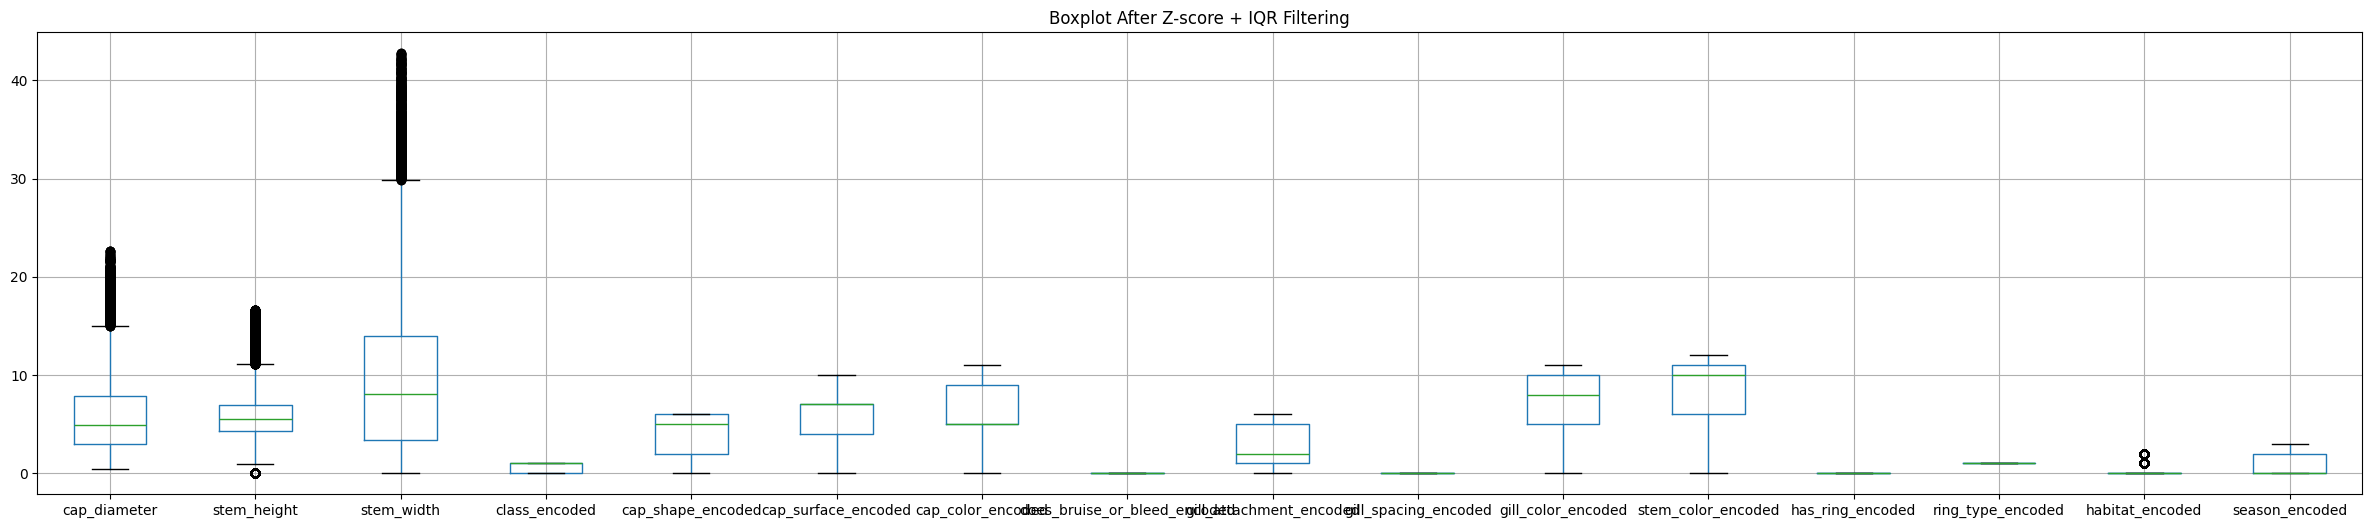

In [18]:
#check if outliers are still present or not
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
df_final.boxplot()
plt.title("Boxplot After Z-score + IQR Filtering")
plt.show()

# 7.Feature Engineering

In [19]:
#if outliers are still present we have to perform capping
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    return df_capped
outlier_columns = ['cap_diameter', 'stem_height', 'stem_width',
                   'does_bruise_or_bleed_encoded', 'gill_spacing_encoded',
                   'habitat_encoded', 'ring_type_encoded', 'has_ring_encoded']
df_capped = cap_outliers_iqr(df2, outlier_columns)

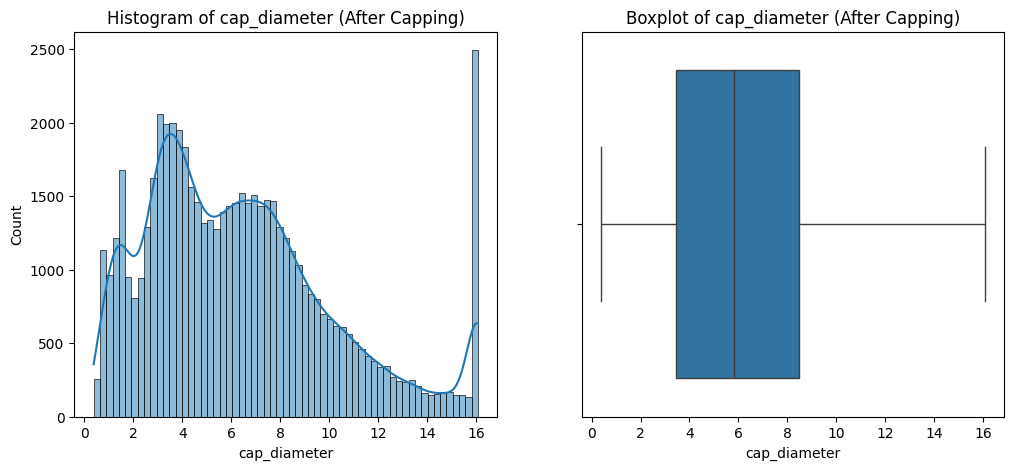

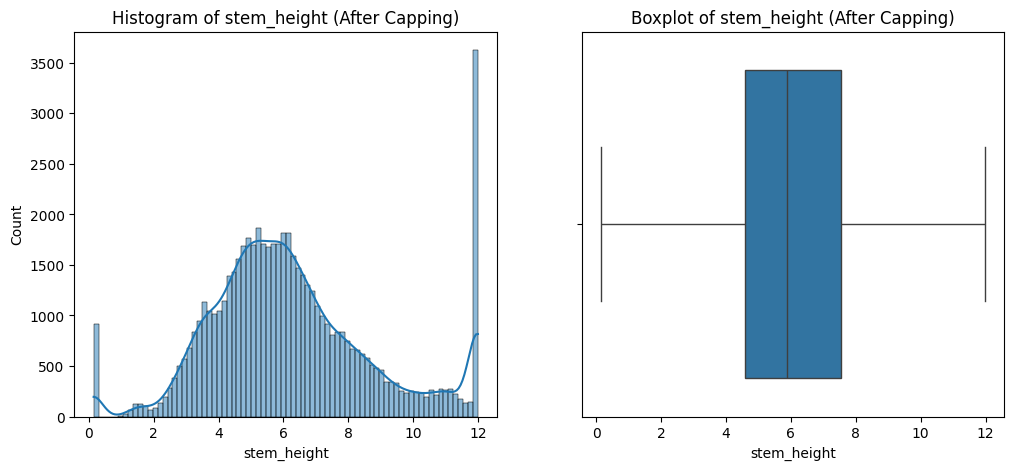

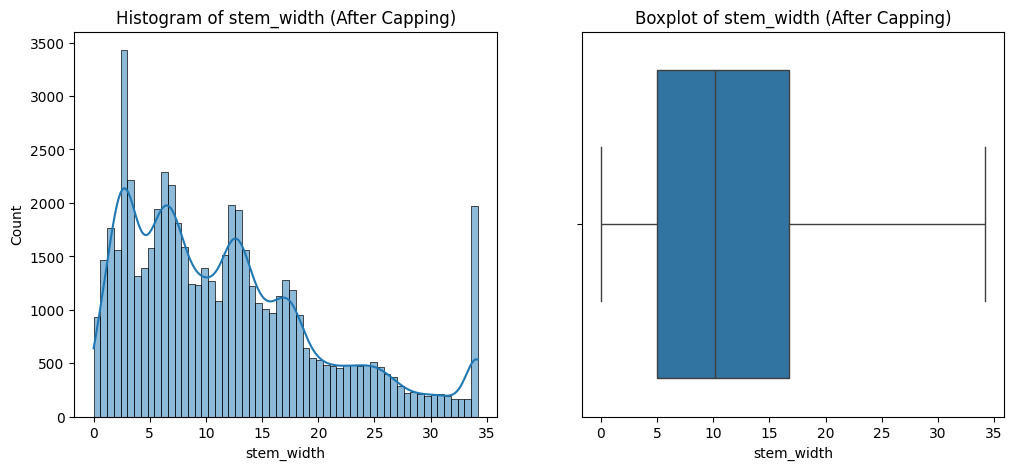

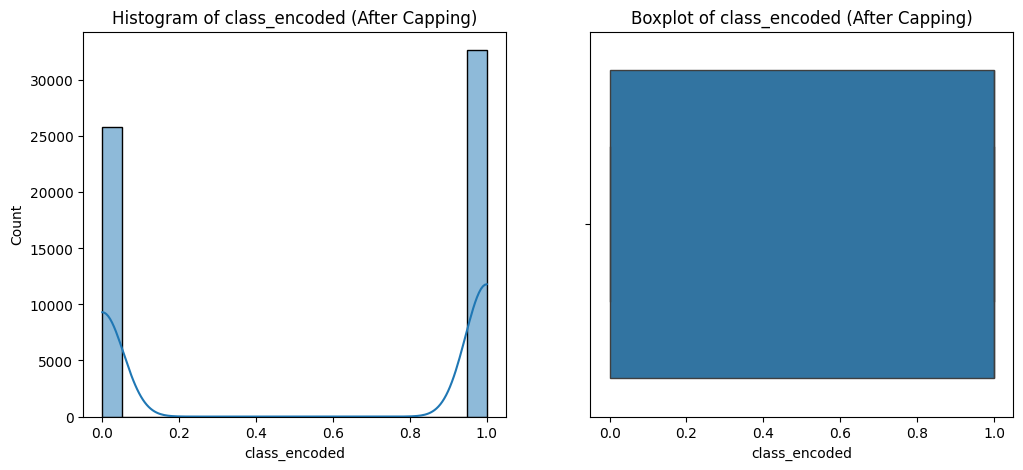

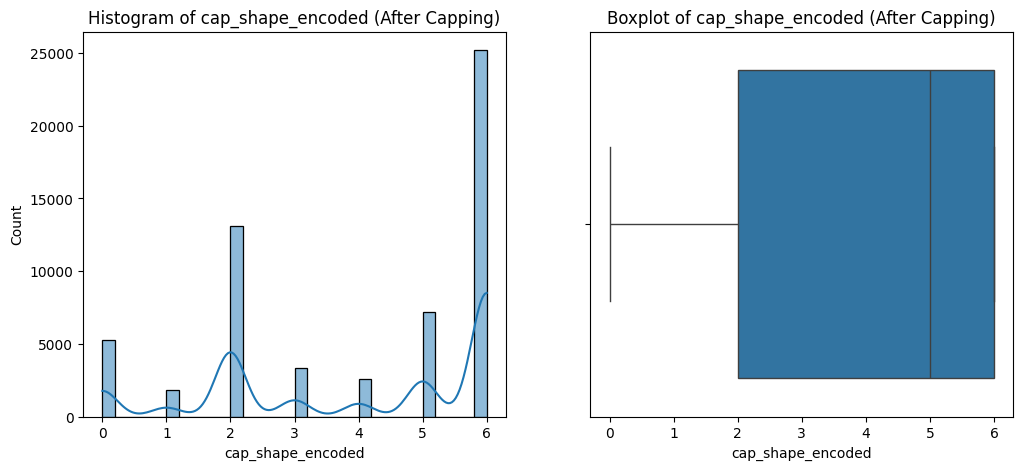

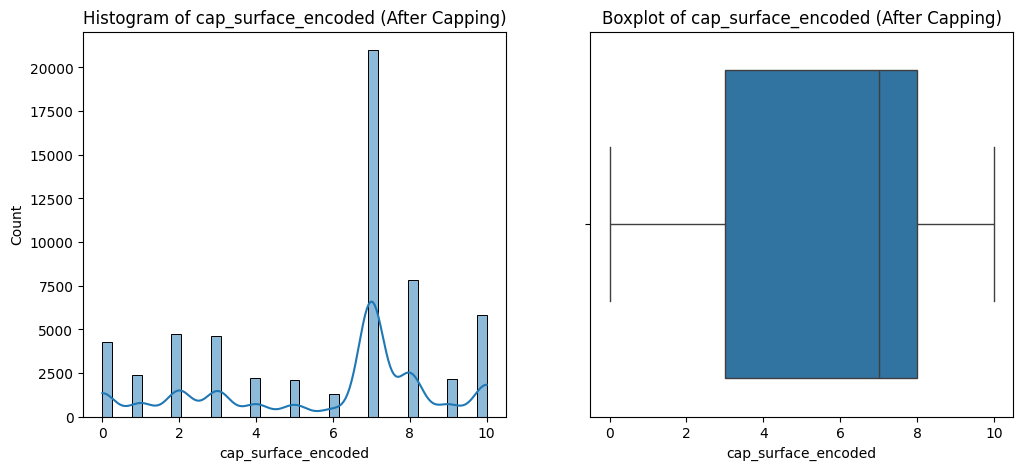

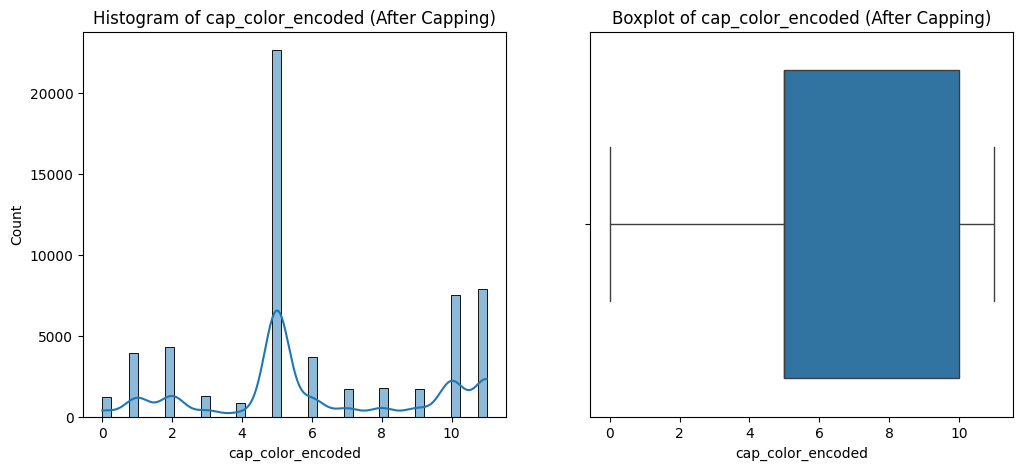

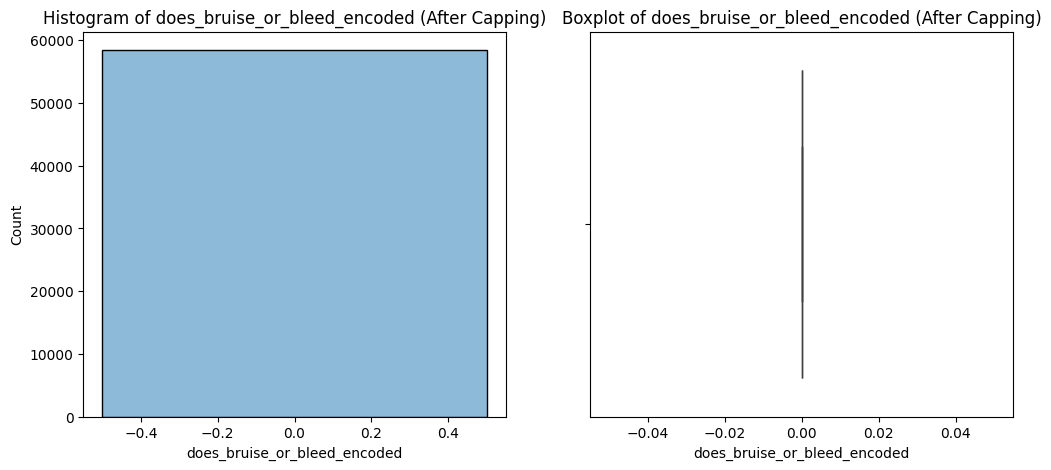

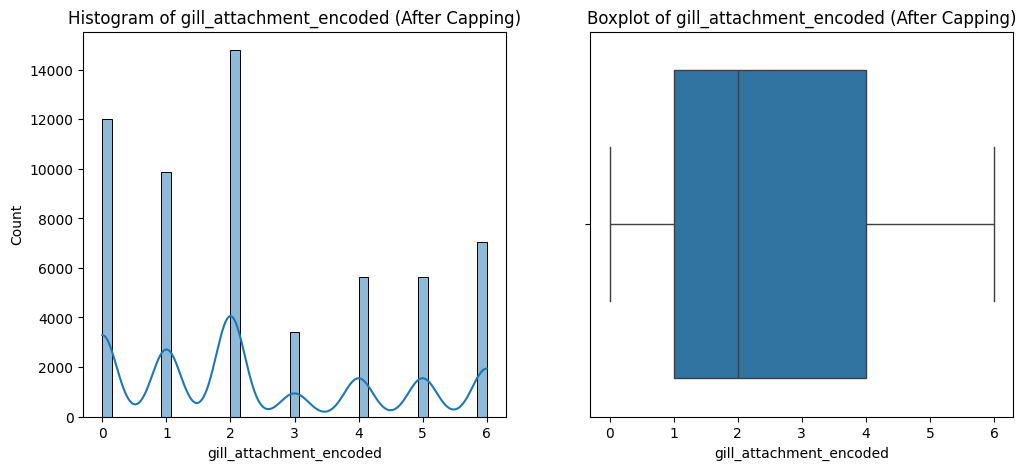

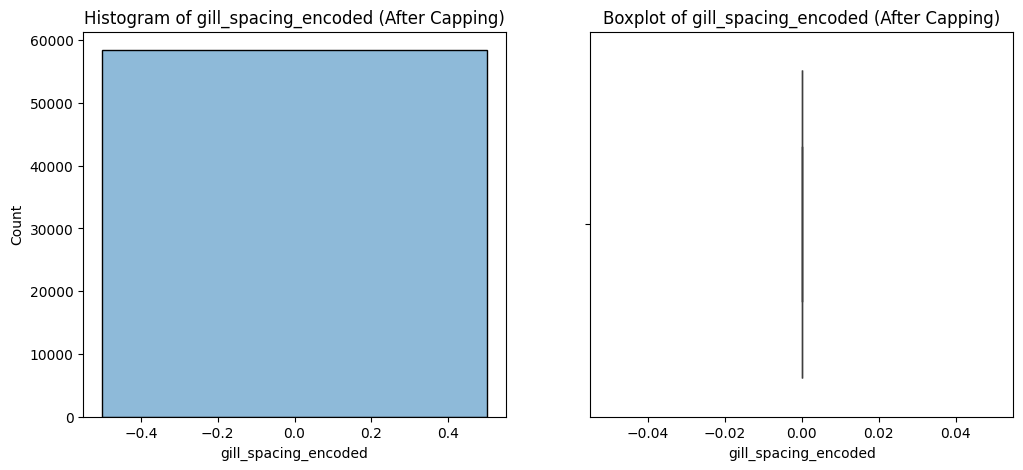

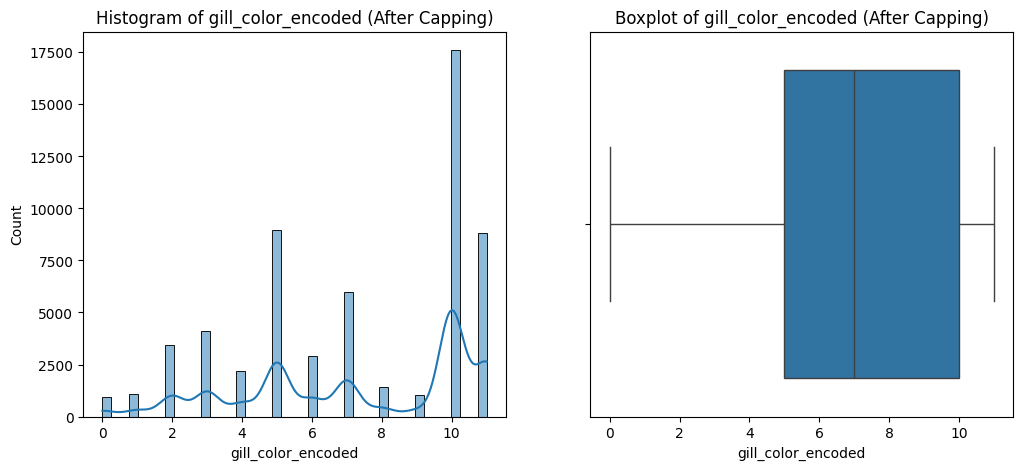

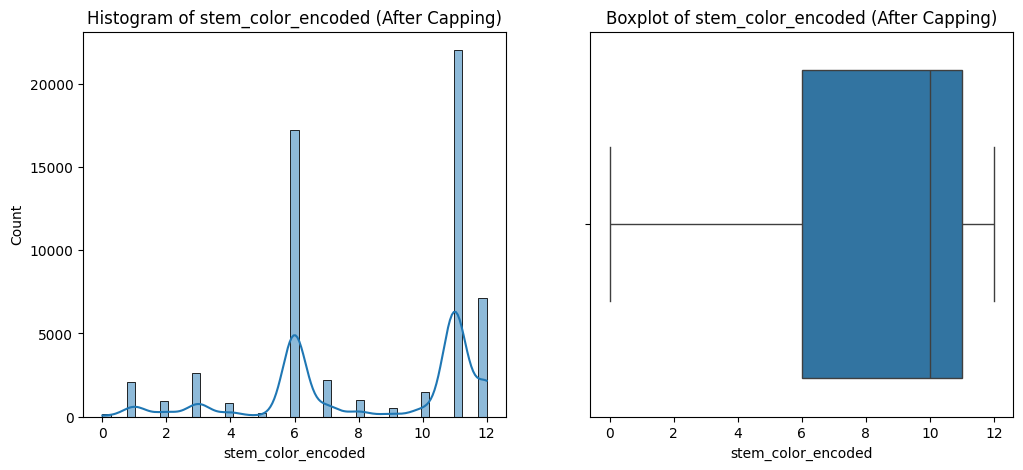

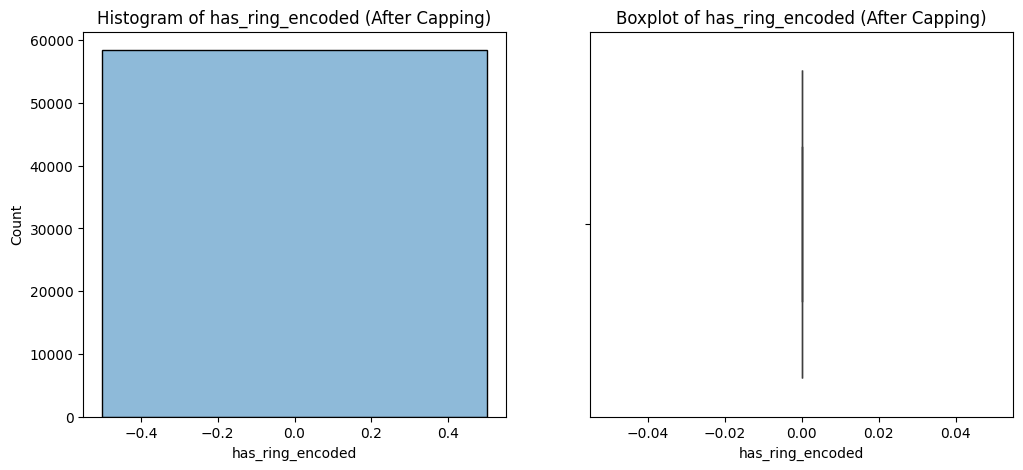

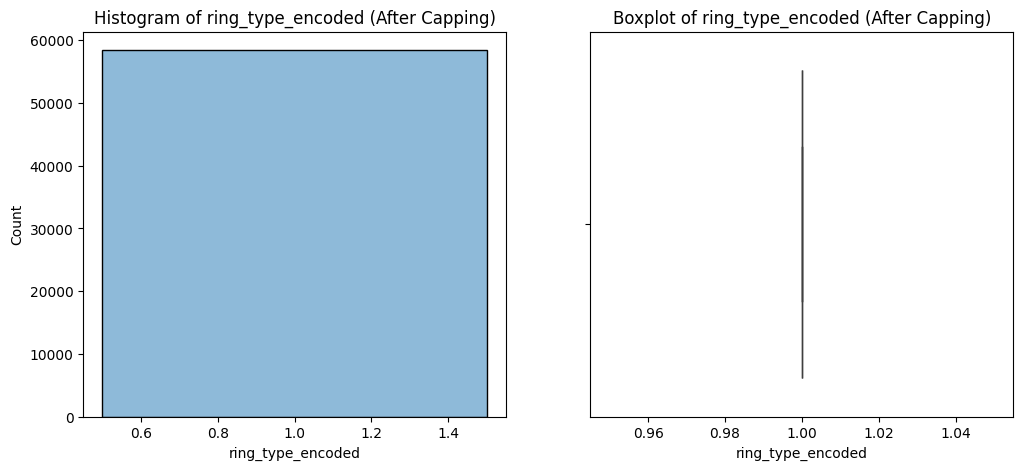

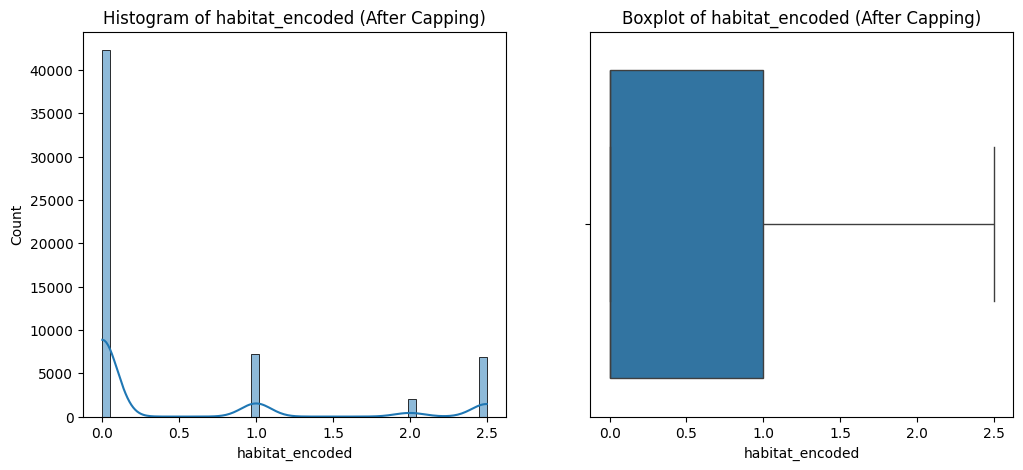

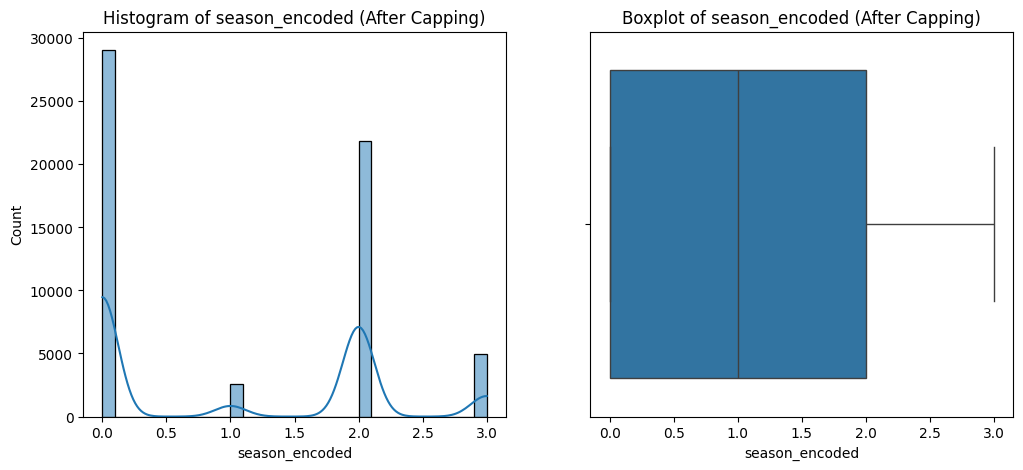

In [20]:
# Visualize the data after capping
for column in df_capped:
    plt.figure(figsize=(12, 5))
    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_capped[column], kde=True)
    plt.title(f'Histogram of {column} (After Capping)')
    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_capped[column])
    plt.title(f'Boxplot of {column} (After Capping)')
    plt.show()

In [21]:
df2=df_capped

In [22]:
# Visualize correlations between multiple variables.
corr=df2.select_dtypes(include=np.number).corr()
corr

,cap_diameter,stem_height,stem_width,class_encoded,cap_shape_encoded,cap_surface_encoded,cap_color_encoded,does_bruise_or_bleed_encoded,gill_attachment_encoded,gill_spacing_encoded,gill_color_encoded,stem_color_encoded,has_ring_encoded,ring_type_encoded,habitat_encoded,season_encoded
cap_diameter,1.000000,0.525914,0.820672,-0.168888,0.149518,0.039469,-0.018024,NaN,0.165903,NaN,0.212274,0.065464,NaN,NaN,-0.176251,0.023777
stem_height,0.525914,1.000000,0.471703,-0.100791,0.058076,0.050251,-0.038728,NaN,0.135111,NaN,0.152282,0.158099,NaN,NaN,-0.064873,-0.037997
stem_width,0.820672,0.471703,1.000000,-0.184004,0.166938,0.048319,0.007605,NaN,0.217733,NaN,0.106410,0.099623,NaN,NaN,-0.167662,0.009331
class_encoded,-0.168888,-0.100791,-0.184004,1.000000,-0.083735,-0.021790,0.039881,NaN,-0.057749,NaN,-0.038816,-0.093341,NaN,NaN,-0.020984,-0.056895
cap_shape_encoded,0.149518,0.058076,0.166938,-0.083735,1.000000,-0.091910,-0.001567,NaN,-0.031972,NaN,0.098192,0.004613,NaN,NaN,-0.116139,-0.020502
cap_surface_encoded,0.039469,0.050251,0.048319,-0.021790,-0.091910,1.000000,0.115880,NaN,0.050655,NaN,-0.026067,0.121520,NaN,NaN,0.064416,0.014943
cap_color_encoded,-0.018024,-0.038728,0.007605,0.039881,-0.001567,0.115880,1.000000,NaN,0.000832,NaN,0.127384,0.264712,NaN,NaN,0.028349,0.012939
does_bruise_or_bleed_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill_attachment_encoded,0.165903,0.135111,0.217733,-0.057749,-0.031972,0.050655,0.000832,NaN,1.000000,NaN,0.070026,0.036361,NaN,NaN,-0.116304,-0.036369
gill_spacing_encoded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It shows how strongly two variables are related

Correlation values range from -1 to +1:

+1 → perfect positive relationship (both increase together)

-1 → perfect negative relationship (one increases, other decreases)

0 → no relationship



# 8. Feature Selection:

In [26]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
X = df2.drop('class_encoded', axis=1) #All columns except class_encoded
y = df2['class_encoded']  #the target you want to predict =class_encoded
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
# for craeting a data frame for displaying list
feature_importance_df2 = pd.DataFrame({'Feature': X.columns,'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df2)

                         Feature  Importance
2                     stem_width    0.155819
7        gill_attachment_encoded    0.119906
4            cap_surface_encoded    0.116942
1                    stem_height    0.109578
0                   cap_diameter    0.099778
10            stem_color_encoded    0.097166
9             gill_color_encoded    0.089195
5              cap_color_encoded    0.079267
3              cap_shape_encoded    0.069534
13               habitat_encoded    0.041094
14                season_encoded    0.021720
6   does_bruise_or_bleed_encoded    0.000000
8           gill_spacing_encoded    0.000000
12             ring_type_encoded    0.000000
11              has_ring_encoded    0.000000




*   Higher importance score = the feature contributed more to the model’s predictions.

* Lower score = less impact; might be redundant or not useful at all.

**stem_width** is your most important feature for classification in this dataset.

**gill_spacing_encoded, ring_type_encoded , has_ring_encoded, and does_bruise_or_bleed_encoded** are least useful, at least according to the Random Forest.



In [31]:
#drop features with zero importance
df2 = X.drop(['does_bruise_or_bleed_encoded', 'gill_spacing_encoded','ring_type_encoded', 'has_ring_encoded'], axis=1)
df2

,cap_diameter,stem_height,stem_width,cap_shape_encoded,cap_surface_encoded,cap_color_encoded,gill_attachment_encoded,gill_color_encoded,stem_color_encoded,habitat_encoded,season_encoded
0,15.26,11.99,17.09,6,2.0,6,2.0,10,11,0.0,3
1,16.08,11.99,18.19,6,2.0,6,2.0,10,11,0.0,2
2,14.07,11.99,17.74,6,2.0,6,2.0,10,11,0.0,3
3,14.17,11.99,15.98,2,3.0,1,2.0,10,11,0.0,3
4,14.64,11.99,17.20,6,3.0,6,2.0,10,11,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,5,7.0,11,3.0,2,12,0.0,0
61065,1.27,3.18,5.43,2,7.0,11,3.0,2,12,0.0,0
61066,1.27,3.86,6.37,5,7.0,11,3.0,2,12,0.0,2
61067,1.24,3.56,5.44,2,7.0,11,3.0,2,12,0.0,2


<Axes: >

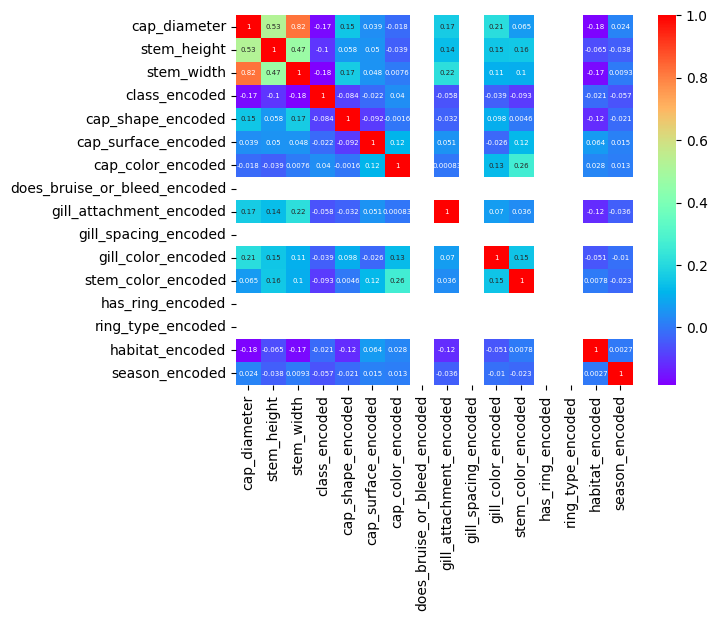

In [32]:
#Heatmap Correlation are used to identify strong correlations, patterns, and relationships between variables.
sns.heatmap(corr, annot=True, cmap='rainbow', annot_kws={"size": 5})

* Symmetrical Distribution: Skewness is around 0.
* Moderately Skewed: Skewness between -0.5 and 0.5.
* Highly Skewed: Skewness less than -1 or greater than 1

In [33]:
df2.select_dtypes(include= ['number']).skew()

,0
cap_diameter,0.794308
stem_height,0.544303
stem_width,0.882878
cap_shape_encoded,-0.545891
cap_surface_encoded,-0.594126
cap_color_encoded,0.110983
gill_attachment_encoded,0.477789
gill_color_encoded,-0.458613
stem_color_encoded,-0.603730
habitat_encoded,1.525121




Features like habitat_encoded, stem_width, and cap_diameter are positively skewed (right tail).

Features like cap_surface_encoded, stem_color_encoded are negatively skewed (left tail).

cap_color_encoded, season_encoded, etc., are fairly symmetrical and don't need transformation.





# 9. Split Data into Training and Testing Sets

In [34]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 10.Feature Scaling

<Axes: ylabel='Count'>

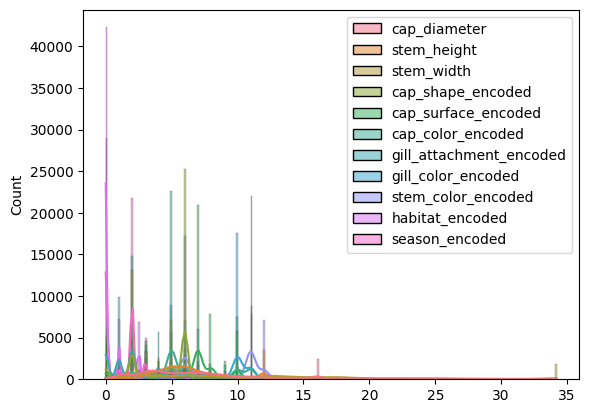

In [35]:
# to plot skewness in datas
sns.histplot(df2,kde=True)

In [36]:
#treat the skewed datas using technique Standardization.
from sklearn.preprocessing import StandardScaler
z= StandardScaler()
df=z.fit_transform(df2)
df

array([[ 2.30766904,  2.24674007,  0.61376688, ...,  0.80806239,
        -0.55905972,  1.77511752],
       [ 2.52087267,  2.24674007,  0.7414464 , ...,  0.80806239,
        -0.55905972,  0.86608168],
       [ 1.99826377,  2.24674007,  0.68921387, ...,  0.80806239,
        -0.55905972,  1.77511752],
       ...,
       [-1.32979289, -0.94081284, -0.63052806, ...,  1.11854957,
        -0.55905972,  0.86608168],
       [-1.33759302, -1.05843472, -0.73847529, ...,  1.11854957,
        -0.55905972,  0.86608168],
       [-1.35579333, -1.17997733, -0.73731456, ...,  1.11854957,
        -0.55905972,  0.86608168]])

<Axes: ylabel='Count'>

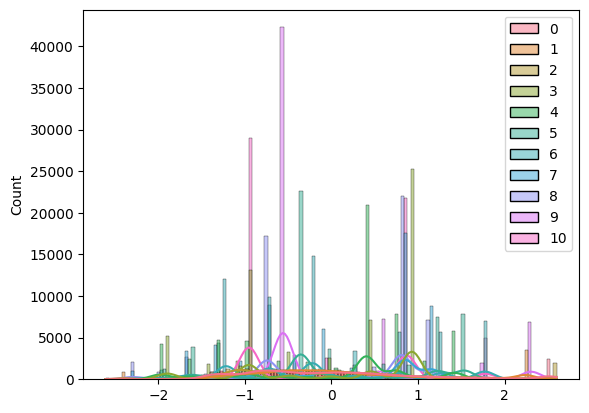

In [37]:
#result of treating skewness
sns.histplot(df,kde=True)

In [38]:
# Fit and transform the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 11. Build the ML Models &
# 12. Model Evaluation:




In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# Initialize models
models = {'Logistic Regression': LogisticRegression(),'SVM': SVC(),'Decision Tree': DecisionTreeClassifier(),'K-Nearest Neighbors': KNeighborsClassifier(),'Random Forest': RandomForestClassifier(),
          'Gradient Boosting': GradientBoostingClassifier(),'AdaBoost': AdaBoostClassifier(),'Naive Bayes': GaussianNB(),'MLP Classifier': MLPClassifier()}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 61.99%
SVM Accuracy: 95.61%
Decision Tree Accuracy: 98.96%
K-Nearest Neighbors Accuracy: 99.45%
Random Forest Accuracy: 99.94%
Gradient Boosting Accuracy: 89.91%
AdaBoost Accuracy: 65.90%
Naive Bayes Accuracy: 61.85%
MLP Classifier Accuracy: 99.52%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(




*   High-performing models:
    * Random Forest	99.92%
    * KNN	99.45%
    * MLP Classifier	99.50%
    * Decision Tree	99.01%
    * SVM	95.61%

These models are likely learning the underlying structure very well, especially if the dataset is clean, has minimal noise, and features are well-encoded.
*   Moderate to Low-performing models:
    * Gradient Boosting	89.91%
    * AdaBoost	65.90%
    * Logistic Regression	61.99%
    * Naive Bayes 61.85%

These models are more sensitive to assumptions or require tuning.

In [40]:
#classification report for each model
from sklearn.metrics import classification_report
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"---- {model_name} ----")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


---- Logistic Regression ----
              precision    recall  f1-score   support

           0       0.44      1.00      0.61      5082
           1       1.00      0.00      0.00      6609

    accuracy                           0.44     11691
   macro avg       0.72      0.50      0.30     11691
weighted avg       0.75      0.44      0.27     11691

---- SVM ----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5082
           1       0.57      1.00      0.72      6609

    accuracy                           0.57     11691
   macro avg       0.28      0.50      0.36     11691
weighted avg       0.32      0.57      0.41     11691

---- Decision Tree ----
              precision    recall  f1-score   support

           0       0.30      0.04      0.08      5082
           1       0.56      0.92      0.69      6609

    accuracy                           0.54     11691
   macro avg       0.43      0.48      0.38     11691
weight

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/u

---- K-Nearest Neighbors ----
              precision    recall  f1-score   support

           0       0.39      0.19      0.25      5082
           1       0.55      0.77      0.64      6609

    accuracy                           0.52     11691
   macro avg       0.47      0.48      0.45     11691
weighted avg       0.48      0.52      0.47     11691

---- Random Forest ----
              precision    recall  f1-score   support

           0       0.70      0.05      0.10      5082
           1       0.57      0.98      0.72      6609

    accuracy                           0.58     11691
   macro avg       0.64      0.52      0.41     11691
weighted avg       0.63      0.58      0.45     11691

---- Gradient Boosting ----
              precision    recall  f1-score   support

           0       0.43      0.10      0.16      5082
           1       0.56      0.90      0.69      6609

    accuracy                           0.55     11691
   macro avg       0.50      0.50      0.43   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


---- AdaBoost ----
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      5082
           1       0.58      0.55      0.56      6609

    accuracy                           0.52     11691
   macro avg       0.51      0.51      0.51     11691
weighted avg       0.52      0.52      0.52     11691

---- Naive Bayes ----
              precision    recall  f1-score   support

           0       0.43      0.28      0.34      5082
           1       0.56      0.71      0.63      6609

    accuracy                           0.52     11691
   macro avg       0.49      0.50      0.48     11691
weighted avg       0.50      0.52      0.50     11691

---- MLP Classifier ----
              precision    recall  f1-score   support

           0       0.43      0.63      0.51      5082
           1       0.56      0.36      0.44      6609

    accuracy                           0.48     11691
   macro avg       0.50      0.50      0.48     11691
weighted

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


here I choose Random Forest model

Class 0 has very low recall (0.05).
*  Only 5% of actual class 0 samples were correctly predicted.

Even though precision looks okay for class 0, the f1-score is just 0.10, which is extremely poor.

The model is heavily biased toward class 1.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# SMOTE was applied to fix this class imbalance problem
smote = SMOTE(random_state=42)   # SMOTE stands for synthetic minority over-sampling Technique.
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)
print("---- Random Forest After SMOTE ----")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


---- Random Forest After SMOTE ----
[[5078    4]
 [   4 6605]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5082
           1       1.00      1.00      1.00      6609

    accuracy                           1.00     11691
   macro avg       1.00      1.00      1.00     11691
weighted avg       1.00      1.00      1.00     11691



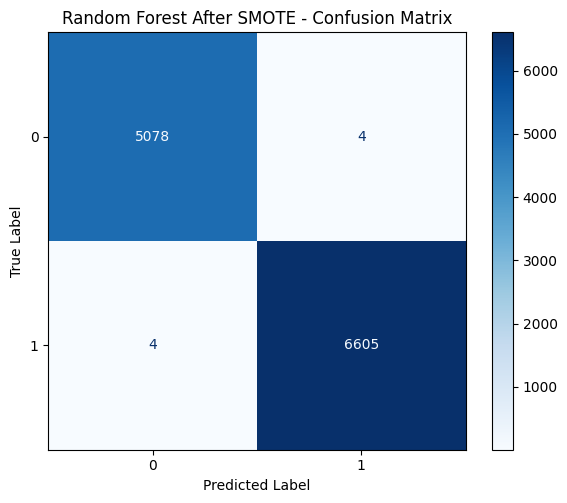

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Random Forest After SMOTE - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.tight_layout()
plt.show()

* Class 0 (Top row):

5078 samples correctly predicted as class 0 (True Negatives)

4 samples incorrectly predicted as class 1 (False Positives)

* Class 1 (Bottom row):

6605 samples correctly predicted as class 1 (True Positives)

4 samples incorrectly predicted as class 0 (False Negatives)

# 13.Hyperparameter Tuning: and  pipeline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 99.91%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5082
           1       1.00      1.00      1.00      6609

    accuracy                           1.00     11691
   macro avg       1.00      1.00      1.00     11691
weighted avg       1.00      1.00      1.00     11691



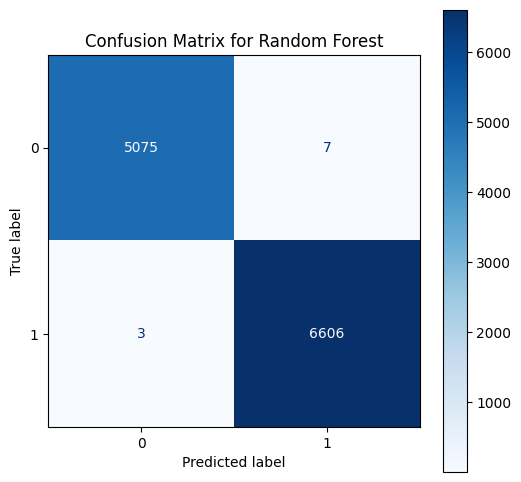

In [ ]:
# Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_rf.predict(X_test)  # makes predictions on the test data using the best Random Forest model obtained from GridSearchCV.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix for Random Forest")
plt.show()


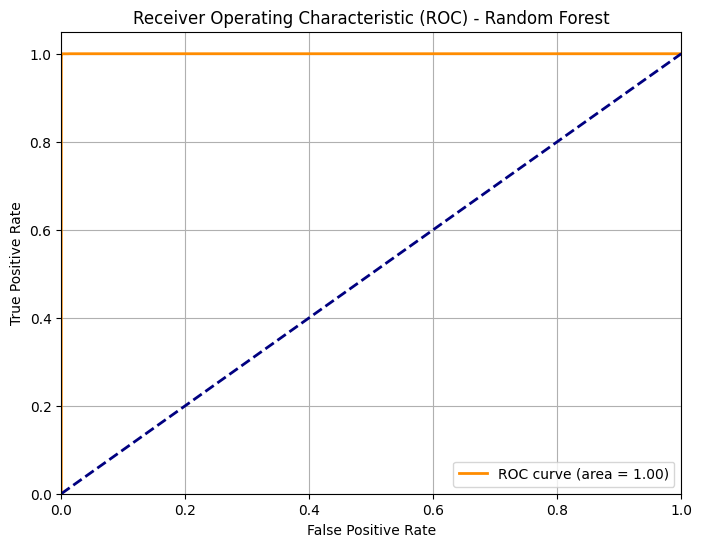

In [ ]:
# Plot the ROC Curve
from sklearn.metrics import roc_curve, auc
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()


* AUC value of 0.5: This means the model has no discriminative ability (it performs just as well as random guessing).

* AUC value of 1: This indicates perfect classification.

* AUC value of < 0.5: This suggests that the model is performing worse than random guessing.

The curve immediately goes to the top-left corner, which suggests the model makes no false positives or negatives.

# 14. Save the Model:

In [ ]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

The model is serialized and stored, allowing it to be reused later without the need to retrain it.

# 15. Test with Unseen Data:

In [ ]:
#to check the accuracy on unseen test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on unseen test data: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on unseen test data: 99.91%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5082
           1       1.00      1.00      1.00      6609

    accuracy                           1.00     11691
   macro avg       1.00      1.00      1.00     11691
weighted avg       1.00      1.00      1.00     11691



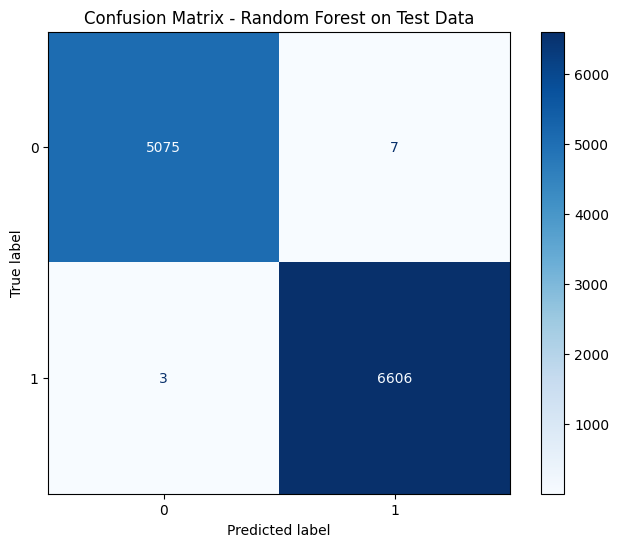

In [ ]:
# confusion matrix on unseen test data
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - Random Forest on Test Data")
plt.show()


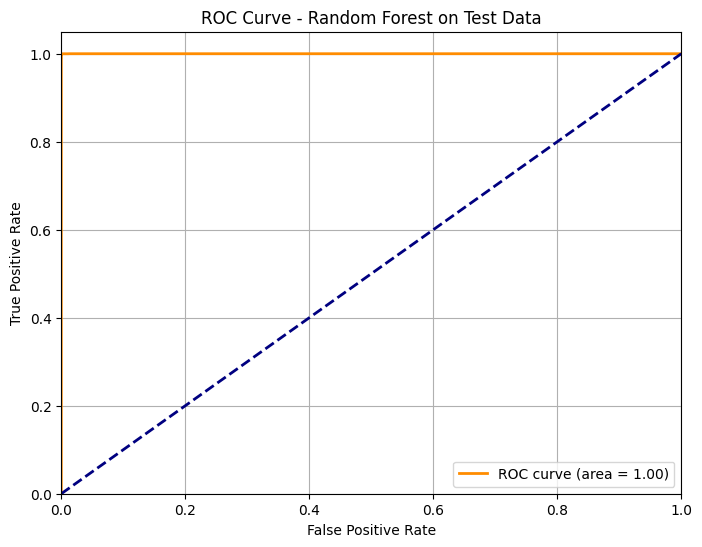

In [ ]:
# ROC Curve
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest on Test Data')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# 16. Interpretation of Results (Conclusion)
The model achieved a high accuracy of 99.91%, which indicates strong performance on the unseen data. The precision, recall, and F1-score suggest that the model can accurately classify both edible and poisonous mushrooms, with a balanced prediction between the classes. However, this performance should be interpreted with caution, as the dataset might be imbalanced, and the model may have overfitted to the training data.

The model consistently predicts both classes with high accuracy.

In conclusion, while the model demonstrates impressive performance, further fine-tuning and validation are necessary to ensure it generalizes well to new, unseen data. Improvements can include addressing class imbalance, feature refinement, or using advanced algorithms.

# 17. Future Work
* Explore advanced models like deep learning (e.g., neural networks) to potentially capture more complex relationships in the data, improving classification accuracy.

* Periodically update the dataset with new mushroom samples to keep the model relevant and improve its ability to generalize.

* Build a Real-Time Web App or Mobile App
Turn your model into an app where users can input mushroom features and get immediate predictions.Useful for education or field research

* Create a Continually Learning System
Periodically update the model with new mushroom data to adapt to:

  * Rare or new species

  * Changes in regional population

* Add External Data for Feature Enhancement
Integrate environmental or geographic features (e.g., humidity, temperature, soil type, altitude).This can improve accuracy by giving the model more context for species identification.

